In [2]:
import cv2 
import dlib 
import numpy as np 
from matplotlib import pyplot as plt

2024-06-01 13:46:10.206 python[29743:15664775] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


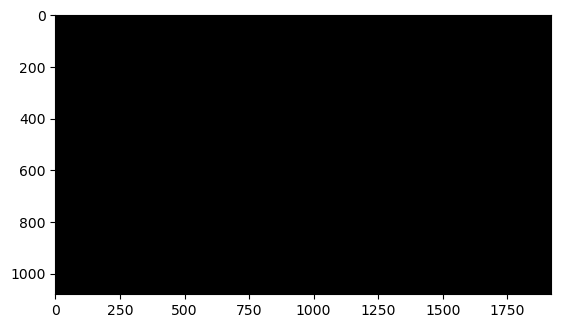

In [3]:
cap = cv2.VideoCapture(0)
plt.imshow(cap.read()[1])

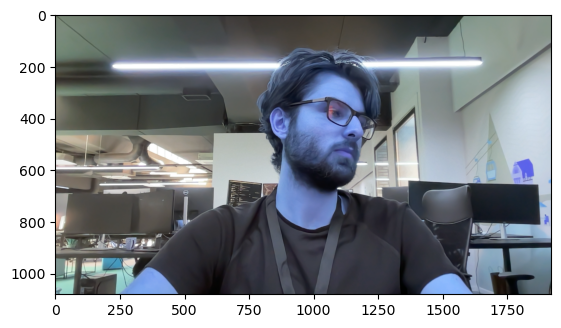

In [4]:
plt.imshow(cap.read()[1])

In [5]:
_, img = cap.read()
img = cv2.resize(img, (720, 640)) 
frame = img.copy() 

# ------------ Model for Age detection --------# 
age_weights = "Models/age_deploy.prototxt"
age_config = "Models/age_net.caffemodel"
age_Net = cv2.dnn.readNet(age_config, age_weights) 

# Model requirements for image 
ageList = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', 
		'(25-32)', '(38-43)', '(48-53)', '(60-100)'] 
model_mean = (78.4263377603, 87.7689143744, 114.895847746) 

# storing the image dimensions 
fH = img.shape[0] 
fW = img.shape[1] 

Boxes = [] # to store the face co-ordinates 
mssg = 'Face Detected' # to display on image 

# ------------- Model for face detection---------# 
face_detector = dlib.get_frontal_face_detector() 
# converting to grayscale 
img_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) 

# -------------detecting the faces--------------# 
faces = face_detector(img_gray) 

# If no faces our detected 
if not faces: 
	mssg = 'No face detected'
	cv2.putText(img, f'{mssg}', (40, 40), 
				cv2.FONT_HERSHEY_SIMPLEX, 2, (200), 2) 
	cv2.imshow('Age detected', img) 
	cv2.waitKey(0) 

else: 
	# --------- Bounding Face ---------# 
	for face in faces: 
		x = face.left() # extracting the face coordinates 
		y = face.top() 
		x2 = face.right() 
		y2 = face.bottom() 

		# rescaling those coordinates for our image 
		box = [x, y, x2, y2] 
		Boxes.append(box) 
		cv2.rectangle(frame, (x, y), (x2, y2), 
					(00, 200, 200), 2) 

	for box in Boxes: 
		face = frame[box[1]:box[3], box[0]:box[2]] 

		# ----- Image preprocessing --------# 
		blob = cv2.dnn.blobFromImage( 
			face, 1.0, (227, 227), model_mean, swapRB=False) 

		# -------Age Prediction---------# 
		age_Net.setInput(blob) 
		age_preds = age_Net.forward() 
		age = ageList[age_preds[0].argmax()] 

		cv2.putText(frame, f'{mssg}:{age}', (box[0], 
											box[1] - 10), 
					cv2.FONT_HERSHEY_SIMPLEX, 0.8, 
					(0, 255, 255), 2, cv2.LINE_AA) 

		cv2.imshow("Detecting Age", frame) 
		cv2.waitKey(0) 

plt.imshow(img)

KeyboardInterrupt: 

In [7]:
age_Net.params

AttributeError: 'cv2.dnn.Net' object has no attribute 'params'